### How many of the new lncRNA genes get tested for eQTLs? How many are eGenes?

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from tqdm import tqdm
from matplotlib.lines import Line2D
import upsetplot as up

In [56]:
# Load in tissue colors 
with open('/home/klawren/oak/gtex/data/other_references/gtex_colors.json') as f:
    tissue_df = pd.DataFrame.from_dict(json.load(f), orient='index')
tissue_df = tissue_df.reset_index(names='tissue_name')
tissue_df['tissue_color_hex'] = '#' + tissue_df['tissue_color_hex']
tissue_color_palette = sns.color_palette(tissue_df['tissue_color_hex'])

# get the versions of tissue ids in file names
tissue_df['tissue_file_name'] = (
    tissue_df['tissue_name']
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
    .str.replace(' - ', '_')
    .str.replace(' ', '_')
)

gene_type_pal= {'lncRNA':'#b70657',
                            'sRNA':'#2D716F',
                            'pseudogene':'#734675',
                            'protein_coding':'#016895', 
                            'artifact':'grey'}

                            
gene_type_order_highlight = ['new_lncRNA', 'existing_lncRNA', 'protein_coding', 'pseudogene', 'sRNA']

# Use a lighter/greyer version for all except new_lncRNA
gene_type_pal_greyed = {
    'new_lncRNA': '#b70657',         
    'existing_lncRNA': '#d6a5b7',    
    'sRNA': '#b3c6c6',           # lighter/greyer teal
    'pseudogene': '#c2b0c6',     # lighter/greyer purple
    'protein_coding': '#a3b9c6', # lighter/greyer blue
    'artifact': '#cccccc'}        # light grey


tissue_color_map = dict(zip(tissue_df['tissue_name'], tissue_df['tissue_color_hex']))

In [37]:
# bring in gencode ids
gencode_ids = pd.read_table('/home/klawren/oak/gtex/data/other_references/gencode/gencode_id_matching_lncrna_category.txt')

/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/3100793000.py:2: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  gencode_ids = pd.read_table('/home/klawren/oak/gtex/data/other_references/gencode/gencode_id_matching_lncrna_category.txt')


load in egene data

In [38]:
egene_results_dir = "/home/klawren/oak/gtex/output/qtl/GTEx_Analysis_v11_eQTL"

# load in the eGene files
etested_cols = []
egene_cols = []
for id, row in tissue_df.iterrows():
    try:
        egene_file = pd.read_table(f"{egene_results_dir}/{row['tissue_file_name']}.v11.eGenes.txt.gz")
        gencode_ids[f'{row['tissue_file_name']}.eqtl_tested'] = gencode_ids['gene_id_v47'].isin(egene_file['gene_id'])
        gencode_ids[f'{row['tissue_file_name']}.eqtl_egene'] = gencode_ids['gene_id_v47'].isin(egene_file[egene_file['qval'] < 0.05]['gene_id'])
        etested_cols.append(f'{row["tissue_file_name"]}.eqtl_tested')
        egene_cols.append(f'{row["tissue_file_name"]}.eqtl_egene')
    except:
        print(f"No eGene results for {row['tissue_file_name']}")



sqtl_results_dir = "/home/klawren/oak/gtex/output/qtl/sqtls"

# load in the eGene files
stested_cols = []
sgene_cols = []
for id, row in tissue_df.iterrows():
    try:
        sqgene_file = pd.read_table(f"{sqtl_results_dir}/{row['tissue_file_name']}.v11.sGenes.txt.gz")
        gencode_ids[f'{row['tissue_file_name']}.sqtl_tested'] = gencode_ids['gene_id_v47'].isin(sqgene_file['gene_id'])
        gencode_ids[f'{row['tissue_file_name']}.sqtl_sgene'] = gencode_ids['gene_id_v47'].isin(sqgene_file[sqgene_file['qval'] < 0.05]['gene_id'])
        stested_cols.append(f'{row["tissue_file_name"]}.sqtl_tested')
        sgene_cols.append(f'{row["tissue_file_name"]}.sqtl_sgene')
    except:
        print(f"No sGene results for {row['tissue_file_name']}")


No eGene results for Artery_Aorta
No eGene results for Artery_Coronary
No eGene results for Artery_Femoral
No eGene results for Artery_Tibial
No eGene results for Brain_Anterior_cingulate_cortex_BA24
No eGene results for Brain_Cerebellar_Hemisphere
No eGene results for Brain_Cerebellum
No eGene results for Brain_Cortex
No eGene results for Brain_Frontal_Cortex_BA9
No eGene results for Brain_Hippocampus
No eGene results for Brain_Hypothalamus
No eGene results for Brain_Nucleus_accumbens_basal_ganglia
No eGene results for Brain_Putamen_basal_ganglia
No eGene results for Brain_Spinal_cord_cervical_c-1
No eGene results for Brain_Substantia_nigra
No eGene results for Breast_Mammary_Tissue
No eGene results for Cells_Cultured_fibroblasts
No eGene results for Cells_EBV-transformed_lymphocytes
No eGene results for Cervix_Ectocervix
No eGene results for Cervix_Endocervix
No eGene results for Colon_Sigmoid
No eGene results for Colon_Transverse
No eGene results for Esophagus_Gastroesophageal_Junct

In [45]:
v10_egene_results_dir = "/home/klawren/oak/gtex/data/other_references/v10/qtls/GTEx_Analysis_v10_eQTL_updated"

# load in the eGene files
egene_cols_v10 = []
etested_cols_v10 = []
for id, row in tissue_df.iterrows():
    try:
        egene_file = pd.read_table(f"{v10_egene_results_dir}/{row['tissue_file_name']}.v10.eGenes.txt.gz")
        gencode_ids[f'{row['tissue_file_name']}.eqtl_tested.v10'] = gencode_ids['gene_id_v47'].isin(egene_file['gene_id'])
        gencode_ids[f'{row['tissue_file_name']}.eqtl_egene.v10'] = gencode_ids['gene_id_v47'].isin(egene_file[egene_file['qval'] < 0.05]['gene_id'])
        etested_cols_v10.append(f'{row["tissue_file_name"]}.eqtl_tested.v10')
        egene_cols_v10.append(f'{row["tissue_file_name"]}.eqtl_egene.v10')
    except:
        print(f"No eGene results for {row['tissue_file_name']}")



v10_sqtl_results_dir = "/home/klawren/oak/gtex/data/other_references/v10/qtls/GTEx_Analysis_v10_sQTL_updated"

# load in the sGene files
sgene_cols_v10 = []
stested_cols_v10 = []
for id, row in tissue_df.iterrows():
    try:
        sqgene_file = pd.read_table(f"{v10_sqtl_results_dir}/{row['tissue_file_name']}.v10.sGenes.txt.gz")
        gencode_ids[f'{row['tissue_file_name']}.sqtl_tested.v10'] = gencode_ids['gene_id_v47'].isin(sqgene_file['gene_id'])
        gencode_ids[f'{row['tissue_file_name']}.sqtl_sgene.v10'] = gencode_ids['gene_id_v47'].isin(sqgene_file[sqgene_file['qval'] < 0.05]['gene_id'])
        stested_cols_v10.append(f'{row["tissue_file_name"]}.sqtl_tested.v10')
        sgene_cols_v10.append(f'{row["tissue_file_name"]}.sqtl_sgene.v10')
    except:
        print(f"No sGene results for {row['tissue_file_name']}")


No eGene results for Artery_Femoral


/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.eqtl_tested.v10'] = gencode_ids['gene_id_v47'].isin(egene_file['gene_id'])
/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.eqtl_egene.v10'] = gencode_ids['gene_id_v47'].isin(egene_file[egene_file['qval'] < 0.05]['gene_id'])
/local/scratch/klawren/slrmtmp.48865987

No eGene results for Cervix_Ectocervix
No eGene results for Cervix_Endocervix


/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.eqtl_tested.v10'] = gencode_ids['gene_id_v47'].isin(egene_file['gene_id'])
/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.eqtl_egene.v10'] = gencode_ids['gene_id_v47'].isin(egene_file[egene_file['qval'] < 0.05]['gene_id'])
/local/scratch/klawren/slrmtmp.48865987

No eGene results for Fallopian_Tube


/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.eqtl_tested.v10'] = gencode_ids['gene_id_v47'].isin(egene_file['gene_id'])
/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.eqtl_egene.v10'] = gencode_ids['gene_id_v47'].isin(egene_file[egene_file['qval'] < 0.05]['gene_id'])
/local/scratch/klawren/slrmtmp.48865987

No eGene results for Kidney_Medulla


/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.eqtl_tested.v10'] = gencode_ids['gene_id_v47'].isin(egene_file['gene_id'])
/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.eqtl_egene.v10'] = gencode_ids['gene_id_v47'].isin(egene_file[egene_file['qval'] < 0.05]['gene_id'])
/local/scratch/klawren/slrmtmp.48865987

No eGene results for Stomach_Mixed_Cell
No eGene results for Stomach_Mucosa
No eGene results for Stomach_Muscularis


/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.eqtl_tested.v10'] = gencode_ids['gene_id_v47'].isin(egene_file['gene_id'])
/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.eqtl_egene.v10'] = gencode_ids['gene_id_v47'].isin(egene_file[egene_file['qval'] < 0.05]['gene_id'])
/local/scratch/klawren/slrmtmp.48865987

No sGene results for Artery_Femoral


/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.sqtl_tested.v10'] = gencode_ids['gene_id_v47'].isin(sqgene_file['gene_id'])
/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.sqtl_sgene.v10'] = gencode_ids['gene_id_v47'].isin(sqgene_file[sqgene_file['qval'] < 0.05]['gene_id'])
/local/scratch/klawren/slrmtmp.4886

No sGene results for Cervix_Ectocervix
No sGene results for Cervix_Endocervix


/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.sqtl_tested.v10'] = gencode_ids['gene_id_v47'].isin(sqgene_file['gene_id'])
/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.sqtl_sgene.v10'] = gencode_ids['gene_id_v47'].isin(sqgene_file[sqgene_file['qval'] < 0.05]['gene_id'])
/local/scratch/klawren/slrmtmp.4886

No sGene results for Fallopian_Tube


/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.sqtl_tested.v10'] = gencode_ids['gene_id_v47'].isin(sqgene_file['gene_id'])
/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.sqtl_sgene.v10'] = gencode_ids['gene_id_v47'].isin(sqgene_file[sqgene_file['qval'] < 0.05]['gene_id'])
/local/scratch/klawren/slrmtmp.4886

No sGene results for Kidney_Medulla


/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.sqtl_tested.v10'] = gencode_ids['gene_id_v47'].isin(sqgene_file['gene_id'])
/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.sqtl_sgene.v10'] = gencode_ids['gene_id_v47'].isin(sqgene_file[sqgene_file['qval'] < 0.05]['gene_id'])
/local/scratch/klawren/slrmtmp.4886

No sGene results for Stomach_Mixed_Cell
No sGene results for Stomach_Mucosa
No sGene results for Stomach_Muscularis


/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.sqtl_tested.v10'] = gencode_ids['gene_id_v47'].isin(sqgene_file['gene_id'])
/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/1644533144.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gencode_ids[f'{row['tissue_file_name']}.sqtl_sgene.v10'] = gencode_ids['gene_id_v47'].isin(sqgene_file[sqgene_file['qval'] < 0.05]['gene_id'])
/local/scratch/klawren/slrmtmp.4886

In [51]:
print(f'v10 sgene_cols on, {len(sgene_cols_v10)} tissues')
print(f'v10 egenes on, {len(egene_cols_v10)} tissues')
print(f'v11 sgene_cols on, {len(sgene_cols)} tissues')
print(f'v11 egenes on, {len(egene_cols)} tissues')


v10 sgene_cols on, 50 tissues
v10 egenes on, 50 tissues
v11 sgene_cols on, 29 tissues
v11 egenes on, 6 tissues


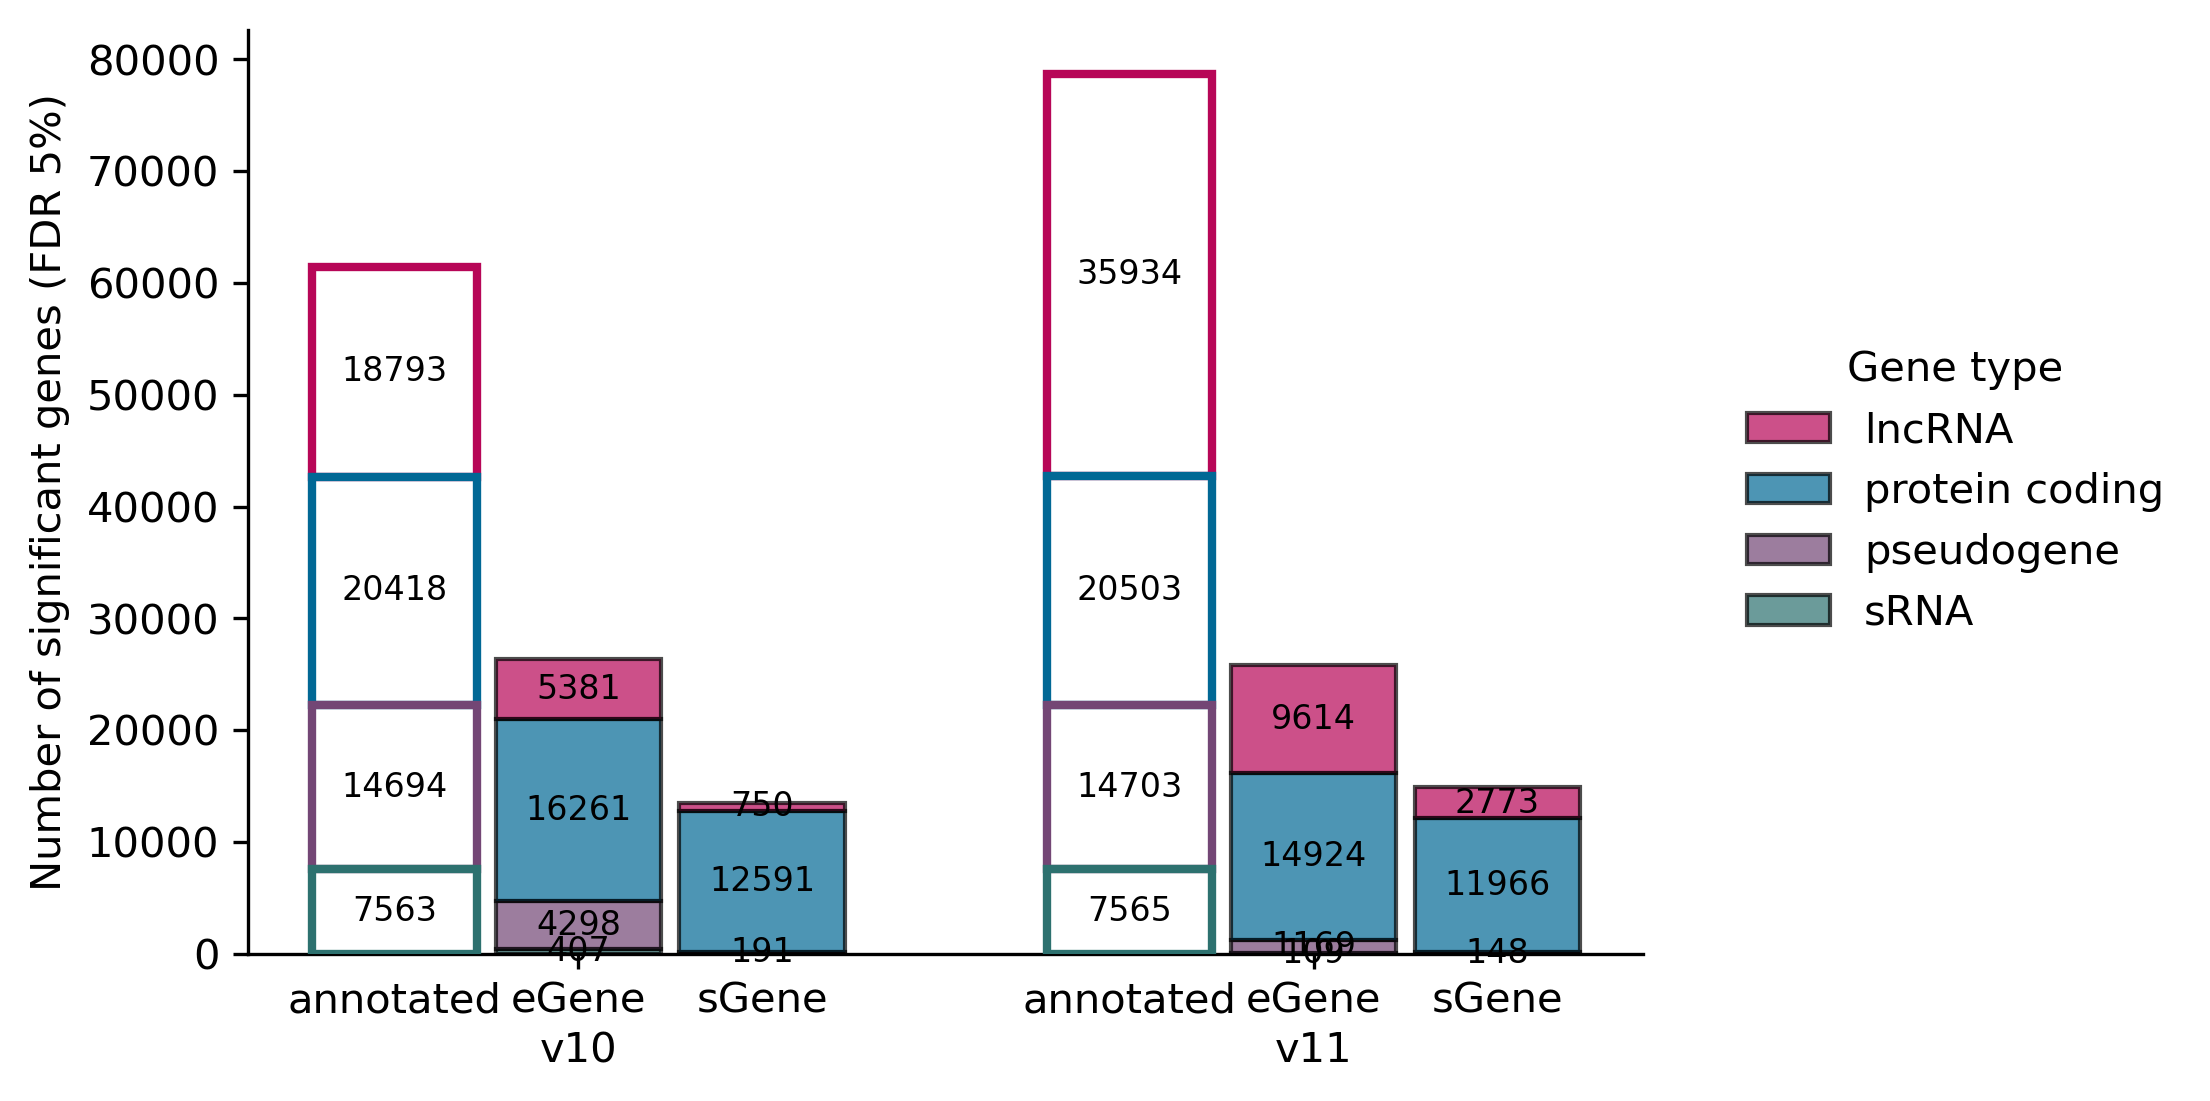

In [96]:
# Calculate e/sGene status for v11 and v10
gencode_ids['is_egene'] = gencode_ids[egene_cols].sum(axis=1) > 0
gencode_ids['is_sgene'] = gencode_ids[sgene_cols].sum(axis=1) > 0
gencode_ids['is_egene_v10'] = gencode_ids[egene_cols_v10].sum(axis=1) > 0
gencode_ids['is_sgene_v10'] = gencode_ids[sgene_cols_v10].sum(axis=1) > 0

# Group lncRNAs together for plotting
gencode_ids['gene_type_grouped'] = np.where(
    gencode_ids['gene_type_grouped_highlight'].str.contains('lncRNA'),
    'lncRNA',
    gencode_ids['gene_type_grouped_highlight']
)

# Set QTL_type order: total, eGene, sGene for v10 and v11
qtl_type_order = ['total_v10', 'is_egene_v10', 'is_sgene_v10', 'total_v11', 'is_egene', 'is_sgene']

# Set gene type hue order: sRNA before pseudogene
gene_type_hue_order = ['sRNA', 'pseudogene', 'protein_coding', 'lncRNA']

# Prepare data for stacked barplot (egenes and sgenes)
bar_data = (
    gencode_ids
    .melt(
        id_vars=['gene_type_grouped'],
        value_vars=['is_egene_v10', 'is_sgene_v10', 'is_egene', 'is_sgene'],
        var_name='QTL_type',
        value_name='is_qtl'
    )
    .query('is_qtl')
    .groupby(['QTL_type', 'gene_type_grouped'])
    .size()
    .reset_index(name='Number of genes')
)

# Add total bars for v10 and v11
total_v10 = (
    gencode_ids[~gencode_ids['gene_id_v39'].isna()]
    .groupby('gene_type_grouped')
    .size()
    .reset_index(name='Number of genes')
)
total_v10['QTL_type'] = 'total_v10'

total_v11 = (
    gencode_ids[~gencode_ids['gene_id_v47'].isna()]
    .groupby('gene_type_grouped')
    .size()
    .reset_index(name='Number of genes')
)
total_v11['QTL_type'] = 'total_v11'

# Concatenate totals to bar_data
bar_data = pd.concat([bar_data, total_v10, total_v11], ignore_index=True)

# Ensure QTL_type is categorical with the specified order
bar_data['QTL_type'] = pd.Categorical(bar_data['QTL_type'], categories=qtl_type_order, ordered=True)
bar_data = bar_data.sort_values('QTL_type')

# Ensure gene_type_grouped is categorical with the specified hue order
bar_data['gene_type_grouped'] = pd.Categorical(bar_data['gene_type_grouped'], categories=gene_type_hue_order, ordered=True)

# Pivot for stacked barplot
bar_data_pivot = bar_data.pivot(index='QTL_type', columns='gene_type_grouped', values='Number of genes').fillna(0)
bar_data_pivot = bar_data_pivot.loc[qtl_type_order, gene_type_hue_order]  # Ensure correct order

# Create new x positions so total is on the left for each version, followed by eGene and sGene
x_labels = ['v10', 'v10', 'v10', 'v11', 'v11', 'v11']
qtl_labels = ['annotated', 'eGene', 'sGene', 'annotated', 'eGene', 'sGene']
x_pos = [0, 1, 2, 4, 5, 6]  # 0,1,2 for v10; 4,5,6 for v11; gap between 2 and 4

# Use gene_type_pal for colors, following the hue order
colors = [gene_type_pal[gt] for gt in gene_type_hue_order]

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
bar_width = 0.9

# Plot stacked bars for eGene and sGene (filled)
for group_idx, (start, end) in enumerate([(1, 3), (4, 6)]):  # (eGene,sGene) for v10 and v11
    bottom = np.zeros(2)
    for idx, gene_type in enumerate(gene_type_hue_order):
        values = bar_data_pivot.iloc[start:end, idx].values
        # Add label only for the first group and all gene types, so all appear in legend
        bars = ax.bar(
            x_pos[start:end],
            values,
            bottom=bottom,
            label=gene_type if group_idx == 0 else None,
            color=colors[idx],
            edgecolor='black',
            width=bar_width,
            alpha=0.7
        )
        # Add bar labels: just the value in that category, not the total height
        for xi, val in zip(x_pos[start:end], values):
            if val > 0:
                ax.text(xi, bottom[list(x_pos[start:end]).index(xi)] + val / 2, f"{int(val)}", ha='center', va='center', fontsize=8)
        bottom += values

# Plot total bars (outline only, not filled)
for i, total_idx in enumerate([0, 3]):  # total_v10, total_v11
    bottom = 0
    for idx, gene_type in enumerate(gene_type_hue_order):
        value = bar_data_pivot.iloc[total_idx, idx]
        # Add label for totals only for the first total bar (v10) and all gene types, so all appear in legend
        bar = ax.bar(
            x_pos[total_idx],
            value,
            bottom=bottom,
            color='none',
            edgecolor=colors[idx],
            width=bar_width,
            linewidth=2,
            alpha=1,
            zorder=len(gene_type_hue_order) - idx,
            label=gene_type if i == 0 else None
        )
        # Add bar labels: just the value in that category, not the total height
        if value > 0:
            ax.text(x_pos[total_idx], bottom + value / 2, f"{int(value)}", ha='center', va='center', fontsize=8)
        bottom += value

ax.set_ylabel('Number of significant genes (FDR 5%)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set custom x-ticks and labels, and move them further down
ax.set_xticks([1, 5])
ax.set_xticklabels(['v10', 'v11'])
ax.tick_params(axis='x', which='both', pad=15)

# Add eGene/sGene/total labels below each bar
for i, (x, qtl) in enumerate(zip(x_pos, qtl_labels)):
    ax.text(x, -ax.get_ylim()[1]*0.03, qtl, ha='center', va='top')

# Add legend for gene types, replacing underscores with spaces in labels, and reverse order
handles, labels = ax.get_legend_handles_labels()
# Remove duplicate labels while preserving order
seen = set()
unique_handles_labels = [(h, l) for h, l in zip(handles, labels) if not (l in seen or seen.add(l))]
handles, labels = zip(*unique_handles_labels)
labels = [label.replace('_', ' ') for label in labels]
handles, labels = handles[::-1], labels[::-1]
ax.legend(handles, labels, title='Gene type', frameon=False)
sns.move_legend(ax, "center right", bbox_to_anchor=(1.4, .5))

plt.show()

In [41]:
# load in tissue sample sizes
sample_meta = pd.read_csv('/home/klawren/oak/gtex/data/other_references/v10/GTEx_Analysis_v10_Annotations_SampleAttributesDS.txt', sep='\t')
passed_samples = sample_meta[sample_meta['SMAFRZE']=='RNASEQ']
num_samples = pd.DataFrame(passed_samples.groupby('SMTSD').size()).rename(columns={0:'num_samples'})

qtl_tissue_df = pd.merge(tissue_df, num_samples, left_on='tissue_name', right_on='SMTSD', how='left')
qtl_tissue_df = qtl_tissue_df[qtl_tissue_df['num_samples'] > 30]

/local/scratch/klawren/slrmtmp.48865987/ipykernel_45614/961625645.py:2: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_meta = pd.read_csv('/home/klawren/oak/gtex/data/other_references/v10/GTEx_Analysis_v10_Annotations_SampleAttributesDS.txt', sep='\t')


In [42]:
num_sgenes = gencode_ids[gencode_ids['gene_type_grouped_highlight']=='new_lncRNA'][sgene_cols].sum().reset_index(name='num_sgenes')
num_sgenes['tissue_file_name'] = num_sgenes['index'].str.split('.').str[0]
num_qtl_genes =pd.merge(qtl_tissue_df, num_sgenes[['num_sgenes', 'tissue_file_name']], on='tissue_file_name', how='left')

num_egenes = gencode_ids[gencode_ids['gene_type_grouped_highlight']=='new_lncRNA'][egene_cols].sum().reset_index(name='num_egenes')
num_egenes['tissue_file_name'] = num_egenes['index'].str.split('.').str[0]
num_qtl_genes =pd.merge(num_qtl_genes, num_egenes[['num_egenes', 'tissue_file_name']], on='tissue_file_name', how='left')

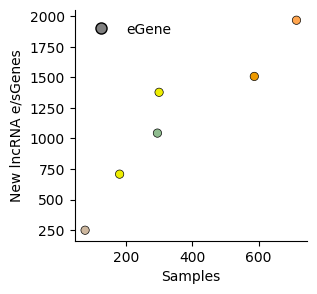

In [43]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.scatterplot(data=num_qtl_genes, x='num_samples', y='num_egenes', hue='tissue_name', legend=False, palette=tissue_color_map, ax=ax, edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Samples')
ax.set_ylabel('New lncRNA e/sGenes')

custom_legend = [
    Line2D([0], [0], marker='o', color='w', label='eGene', markerfacecolor='gray', markeredgecolor='black', markersize=8),
]
ax.legend(handles=custom_legend, loc='upper left', frameon=False, fontsize=10)


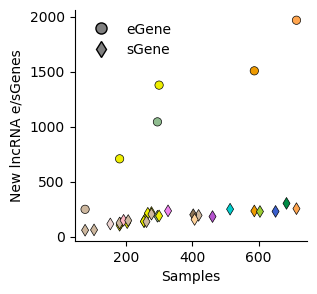

In [44]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.scatterplot(data=num_qtl_genes, x='num_samples', y='num_egenes', hue='tissue_name', legend=False, palette=tissue_color_map, ax=ax, edgecolor='black')
sns.scatterplot(data=num_qtl_genes, x='num_samples', y='num_sgenes', hue='tissue_name', legend=False, marker='d', palette=tissue_color_map, ax=ax, edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Samples')
ax.set_ylabel('New lncRNA e/sGenes')

custom_legend = [
    Line2D([0], [0], marker='o', color='w', label='eGene', markerfacecolor='gray', markeredgecolor='black', markersize=8),
    Line2D([0], [0], marker='d', color='w', label='sGene', markerfacecolor='gray', markeredgecolor='black', markersize=8)
]
ax.legend(handles=custom_legend, loc='upper left', frameon=False, fontsize=10)

In [ ]:
gencode_ids['is_egene'] = gencode_ids[egene_cols].sum(axis=1)>0
gencode_ids['is_sgene'] = gencode_ids[sgene_cols].sum(axis=1)>0

In [ ]:
gen

Total new lncRNA genes:  18312
New lncRNA eGenes:  3151
New lncRNA sGenes:  887


/local/scratch/klawren/slrmtmp.48860077/ipykernel_18583/623346136.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, x='Gene type', y='Number of new lncRNA genes', palette=bar_colors, edgecolor='black', ax=ax)


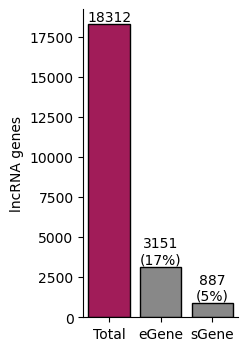

In [152]:
# Calculate counts for new lncRNA category
new_lncRNA_mask = gencode_ids['gene_type_grouped_highlight'] == 'new_lncRNA'
total_new_lncRNA = new_lncRNA_mask.sum()
num_new_lncRNA_egene = (new_lncRNA_mask & gencode_ids['is_egene']).sum()
num_new_lncRNA_sgene = (new_lncRNA_mask & gencode_ids['is_sgene']).sum()

print('Total new lncRNA genes: ', total_new_lncRNA)
print('New lncRNA eGenes: ', num_new_lncRNA_egene)
print('New lncRNA sGenes: ', num_new_lncRNA_sgene)

# Prepare bar data including total, eGene, and sGene
bar_data = pd.DataFrame({
    'Gene type': ['Total', 'eGene', 'sGene'],
    'Number of new lncRNA genes': [total_new_lncRNA, num_new_lncRNA_egene, num_new_lncRNA_sgene]
})

fig, ax = plt.subplots(figsize=(2, 4))
# Plot bars with the 'Total' bar in the new_lncRNA color, others in grey
bar_colors = [gene_type_pal_greyed['new_lncRNA'], '#888888', '#888888']
sns.barplot(data=bar_data, x='Gene type', y='Number of new lncRNA genes', palette=bar_colors, edgecolor='black', ax=ax)

# Add text labels on bars
for i, val in enumerate(bar_data['Number of new lncRNA genes']):
    if bar_data['Gene type'][i] == 'Total':
        ax.text(i, val, f"{val}", ha='center', va='bottom', color='black')
    else:
        ax.text(i, val, f"{val}\n({val/total_new_lncRNA:.0%})", ha='center', va='bottom', color='black')

ax.set_ylabel('lncRNA genes')
ax.set_xlabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


/home/klawren/.pixi/envs/python/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/klawren/.pixi/envs/python/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

dict_keys(['matrix', 'shading', 'totals', 'intersections'])


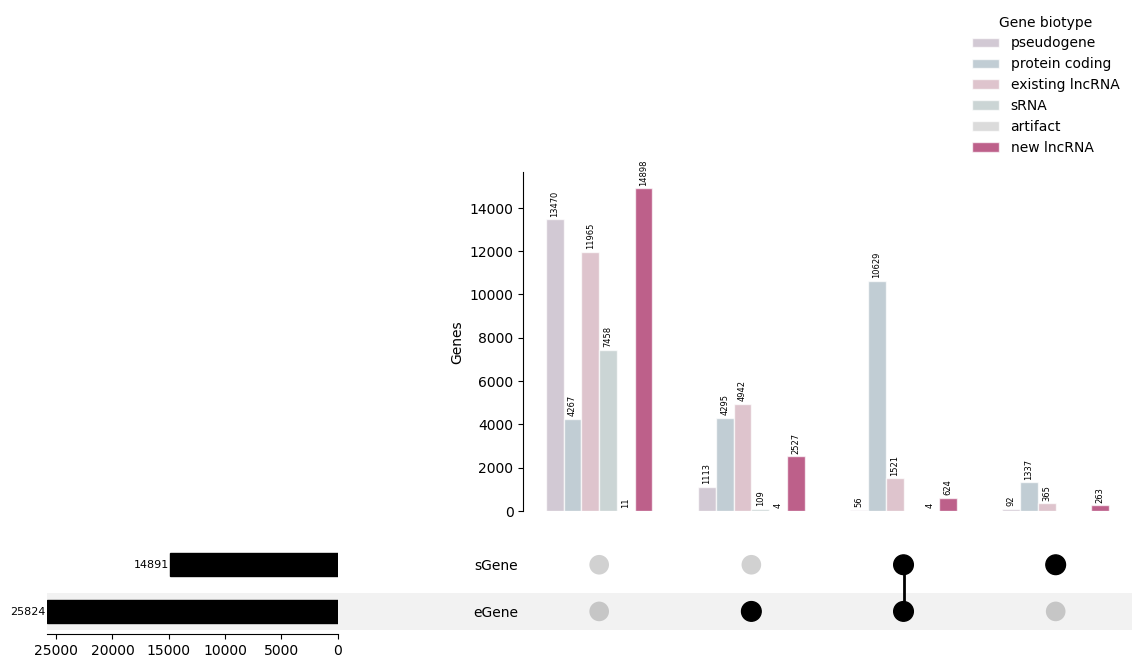

In [135]:
qtl_upset = up.from_indicators(gencode_ids[['is_egene', 'is_sgene']], data=gencode_ids['gene_type_grouped_highlight'])
qtl_upset.index.set_names(['eGene', 'sGene'], inplace=True)
qtl_upset = pd.DataFrame(qtl_upset)
qtl_upset_categories = qtl_upset.index.value_counts().index
category_to_idx = {category: idx for idx, category in enumerate(qtl_upset_categories)}
qtl_upset['idx_loc'] = qtl_upset.index.map(category_to_idx)

fig = plt.figure(figsize=(14, 6))
upset = up.UpSet(qtl_upset, show_counts=False, subset_size='count', intersection_plot_elements=6, totals_plot_elements=2, element_size=None, sort_by='cardinality')
plot_result = upset.plot(fig=fig, )

print(plot_result.keys())

totals_ax = plot_result['totals']
totals_ax.grid(False)
# add numbers to plot
for container in totals_ax.containers:
    totals_ax.bar_label(container, padding=1, fontsize=8,)

bar_ax = plot_result['intersections']
bar_ax.clear()
sns.countplot(qtl_upset, x='idx_loc', hue='gene_type_grouped_highlight',ax=bar_ax, palette=gene_type_pal_greyed, alpha=.7, edgecolor='white', width=.7)
bar_ax.set_ylabel('Genes')
#bar_ax.set_yscale('log')

# add numbers to plot
for container in bar_ax.containers:
    bar_ax.bar_label(container, padding=2, fontsize=6, rotation=90)

sns.move_legend(bar_ax, "upper right", bbox_to_anchor=(1, 1.5), frameon=False, title='Gene biotype')
legend = bar_ax.get_legend()
new_labels = [label.get_text().replace('_', ' ') for label in legend.texts]
for t, new_label in zip(legend.texts, new_labels):
    t.set_text(new_label)

In [ ]:
gencode_ids.groupby(['gene_type_grouped_highlight']).agg({'is_egene': 'sum', 'is_sgene': 'sum', 'gene_id_stable': 'count'}).reset_index()
upset = gencode_ids.groupby(['gene_type_grouped_highlight']).agg({'is_egene': 'sum', 'is_sgene': 'sum', 'gene_id_stable': 'count'}).reset_index().set_index('is_g')
upset = up.from_indicators(upset, 'gene_type_grouped_highlight', 'is_egene', 'is_sgene', 'gene_id_stable')
upset.plot()

TypeError: from_indicators() takes from 1 to 2 positional arguments but 5 were given

cdf plot

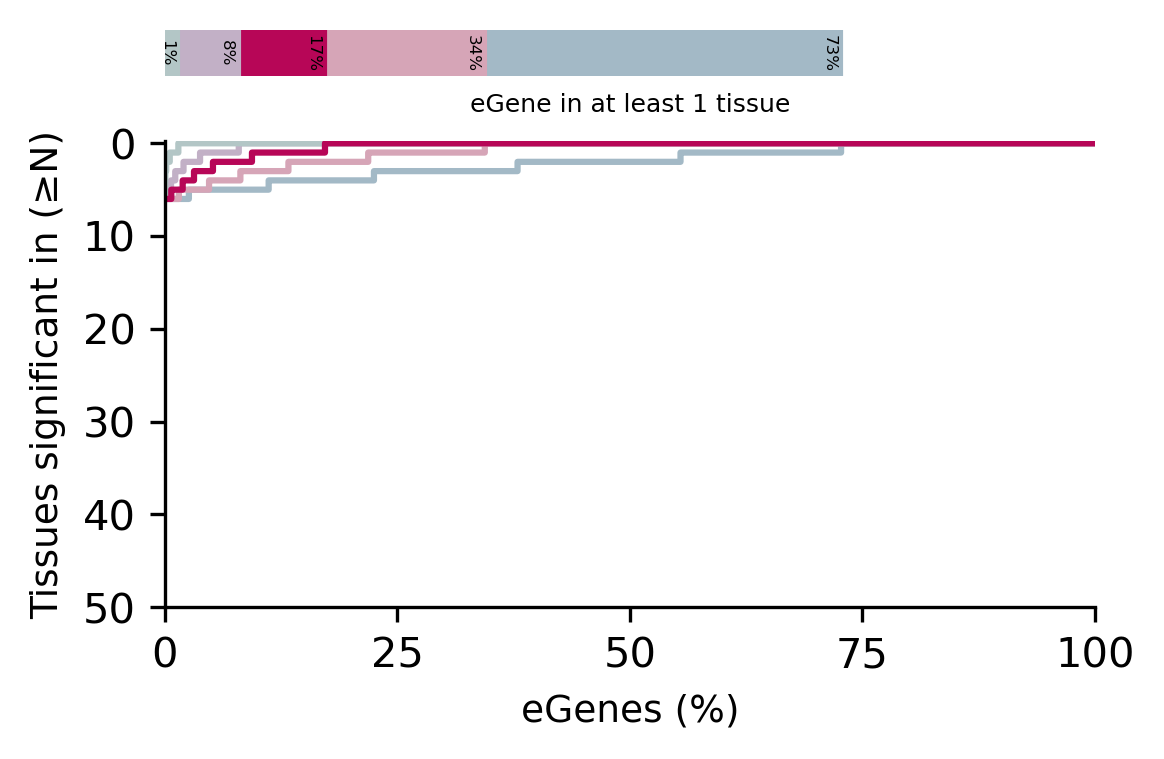

In [93]:
num_tissues = len(qtl_tissue_df)
gencode_ids['num_quantified'] = gencode_ids[egene_cols].sum(axis=1)

gencode_ids['num_not_quantified'] = num_tissues - gencode_ids['num_quantified'] 


zero_expr_props = (
    gencode_ids.groupby('gene_type_grouped_highlight')['num_not_quantified']
    .apply(lambda x: (x == num_tissues).mean())
    .reindex(['new_lncRNA', 'protein_coding', 'sRNA','pseudogene', 'existing_lncRNA'])
)

# Set up figure with two axes: bar on top, ECDF below
fig = plt.figure(figsize=(4, 2.5), dpi=300)
gs = fig.add_gridspec(2, 1, height_ratios=[.2, 2], hspace=0.25)
ax_bar = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

# Horizontal stacked bar plot for proportion expressed in 0 tissues, sorted by value
sorted_zero_expr = zero_expr_props.sort_values(ascending=True)
bar_colors = [gene_type_pal_greyed[gt] for gt in sorted_zero_expr.index]

left = 0
for i, (idx, val) in enumerate(sorted_zero_expr.items()):
    ax_bar.barh(
        y=0,
        width=1-val,
        left=0,
        edgecolor=bar_colors[i],
        height=1.0,
        color=bar_colors[i],
        alpha=1.0,
        label=idx
    )
    # Add bar label at the center of each segment
    ax_bar.text(
        1-val-.005, 0,
        f"{1-val:.0%}",
        va='center',
        ha='right',
        color= 'k',
        fontsize=4,
        rotation=-90
    )

ax_bar.set_yticks([])
ax_bar.set_ylabel('')
ax_bar.set_xlim(0,1)
ax_bar.set_xlabel('eGene in at least 1 tissue', fontsize=6)
ax_bar.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax_bar.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax_bar.tick_params(axis='y', length=2)

# ECDF plot for number of tissues expressed in, by gene type
sns.ecdfplot(
    ax=ax,
    data=gencode_ids,
    y='num_not_quantified',
    hue='gene_type_grouped_highlight',
    hue_order=['new_lncRNA', 'existing_lncRNA', 'protein_coding', 'sRNA','pseudogene'],
    palette=gene_type_pal_greyed, 
    linewidth=1.5
)

#ax.axhspan(49, 50, color='#E98300', alpha=0.3, lw=0, zorder=10, )  

ax.set_xlabel('eGenes (%)', fontsize=9)
ax.set_xticks([0, .25, .5, .75, 1])
ax.set_xticklabels([0, 25, 50, 75, 100])
ax.set_ylabel('Tissues significant in (≥N)', fontsize=9)
ax.set_yticks([0, 10, 20, 30, 40, 50])
ax.set_yticklabels([0, 10, 20, 30, 40, 50][::-1])
ax.spines[['top', 'right']].set_visible(False)
plt.setp(ax.get_legend(), visible=False)
plt.show()

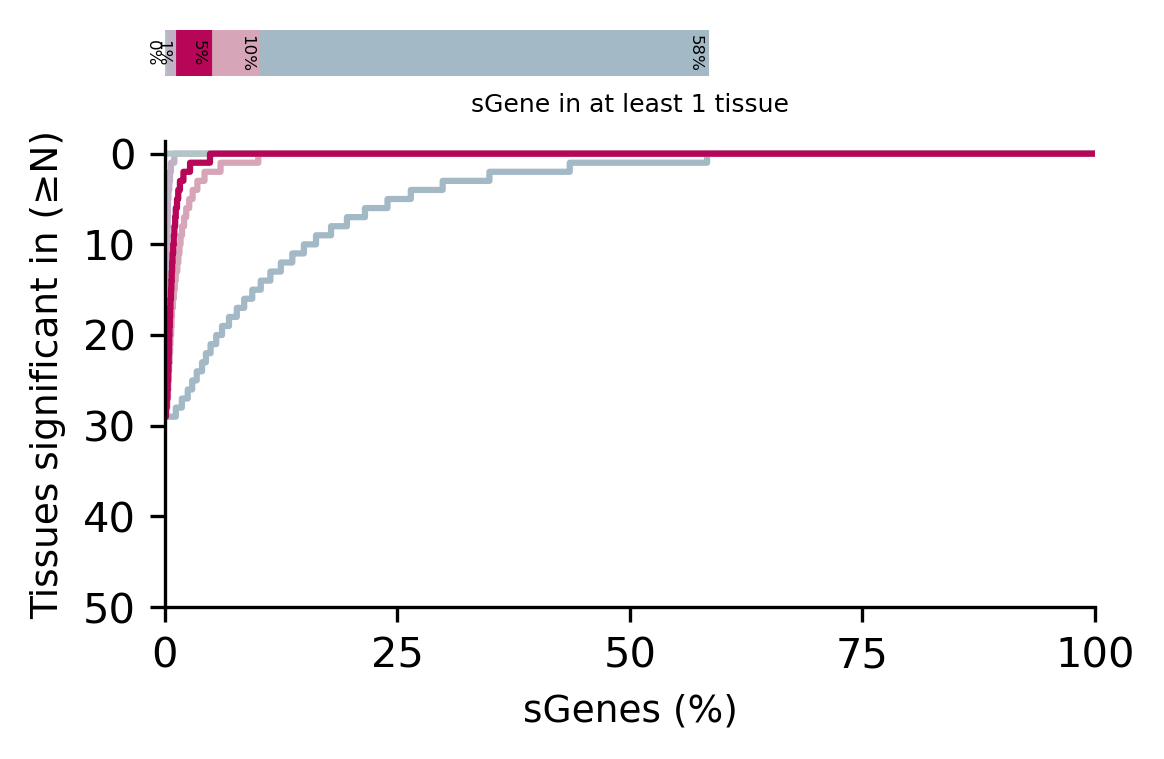

In [94]:
num_tissues = len(qtl_tissue_df)
gencode_ids['num_quantified'] = gencode_ids[sgene_cols].sum(axis=1)
gencode_ids['num_not_quantified'] = num_tissues - gencode_ids['num_quantified'] 


zero_expr_props = (
    gencode_ids.groupby('gene_type_grouped_highlight')['num_not_quantified']
    .apply(lambda x: (x == num_tissues).mean())
    .reindex(['new_lncRNA', 'protein_coding', 'sRNA','pseudogene', 'existing_lncRNA'])
)

# Set up figure with two axes: bar on top, ECDF below
fig = plt.figure(figsize=(4, 2.5), dpi=300)
gs = fig.add_gridspec(2, 1, height_ratios=[.2, 2], hspace=0.25)
ax_bar = fig.add_subplot(gs[0])
ax = fig.add_subplot(gs[1])

# Horizontal stacked bar plot for proportion expressed in 0 tissues, sorted by value
sorted_zero_expr = zero_expr_props.sort_values(ascending=True)
bar_colors = [gene_type_pal_greyed[gt] for gt in sorted_zero_expr.index]

left = 0
for i, (idx, val) in enumerate(sorted_zero_expr.items()):
    ax_bar.barh(
        y=0,
        width=1-val,
        left=0,
        edgecolor=bar_colors[i],
        height=1.0,
        color=bar_colors[i],
        alpha=1.0,
        label=idx
    )
    # Add bar label at the center of each segment
    ax_bar.text(
        1-val-.005, 0,
        f"{1-val:.0%}",
        va='center',
        ha='right',
        color= 'k',
        fontsize=4,
        rotation=-90
    )

ax_bar.set_yticks([])
ax_bar.set_ylabel('')
ax_bar.set_xlim(0,1)
ax_bar.set_xlabel('sGene in at least 1 tissue', fontsize=6)
ax_bar.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax_bar.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax_bar.tick_params(axis='y', length=2)

# ECDF plot for number of tissues expressed in, by gene type
sns.ecdfplot(
    ax=ax,
    data=gencode_ids,
    y='num_not_quantified',
    hue='gene_type_grouped_highlight',
    hue_order=['new_lncRNA', 'existing_lncRNA', 'protein_coding', 'sRNA','pseudogene'],
    palette=gene_type_pal_greyed, 
    linewidth=1.5
)

#ax.axhspan(49, 50, color='#E98300', alpha=0.3, lw=0, zorder=10, )  

ax.set_xlabel('sGenes (%)', fontsize=9)
ax.set_xticks([0, .25, .5, .75, 1])
ax.set_xticklabels([0, 25, 50, 75, 100])
ax.set_ylabel('Tissues significant in (≥N)', fontsize=9)
ax.set_yticks([0, 10, 20, 30, 40, 50])
ax.set_yticklabels([0, 10, 20, 30, 40, 50][::-1])
ax.spines[['top', 'right']].set_visible(False)
plt.setp(ax.get_legend(), visible=False)
plt.show()

proportion expressed across types

In [113]:
gencode_ids['gene_type_category'] = np.where(gencode_ids['lncrna_category'].isna(), gencode_ids['gene_type_grouped_highlight'], gencode_ids['gene_type_grouped_highlight'] + '_' + gencode_ids['lncrna_category'].fillna(''))
gencode_ids['gene_type_category'].value_counts()

gene_type_category
protein_coding                              20528
pseudogene                                  14731
new_lncRNA_intergenic                       12843
existing_lncRNA_intergenic                   7897
sRNA                                         7567
existing_lncRNA_antisense                    6738
new_lncRNA_antisense                         4420
existing_lncRNA_other                        2186
existing_lncRNA_sense                        1562
new_lncRNA_sense                              923
existing_lncRNA_overlapping_both_strands      410
new_lncRNA_overlapping_both_strands           121
artifact                                       19
new_lncRNA_other                                5
Name: count, dtype: int64

In [114]:
# proportion of group expressed in each tissue category
total_egene = gencode_ids.groupby('gene_type_category').agg({tissue: 'mean' for tissue in egene_cols})
total_tested_eqtl = gencode_ids.groupby('gene_type_category').agg({tissue: 'mean' for tissue in etested_cols})

proportion_egene = total_egene/total_tested_eqtl.values
proportion_egene = proportion_egene.reset_index().melt(id_vars='gene_type_category', value_vars=egene_cols, value_name='proportion_egene')
proportion_egene['tissue'] = proportion_egene['variable'].str.split('.quantified').str[0]

/home/klawren/.pixi/envs/python/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/klawren/.pixi/envs/python/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


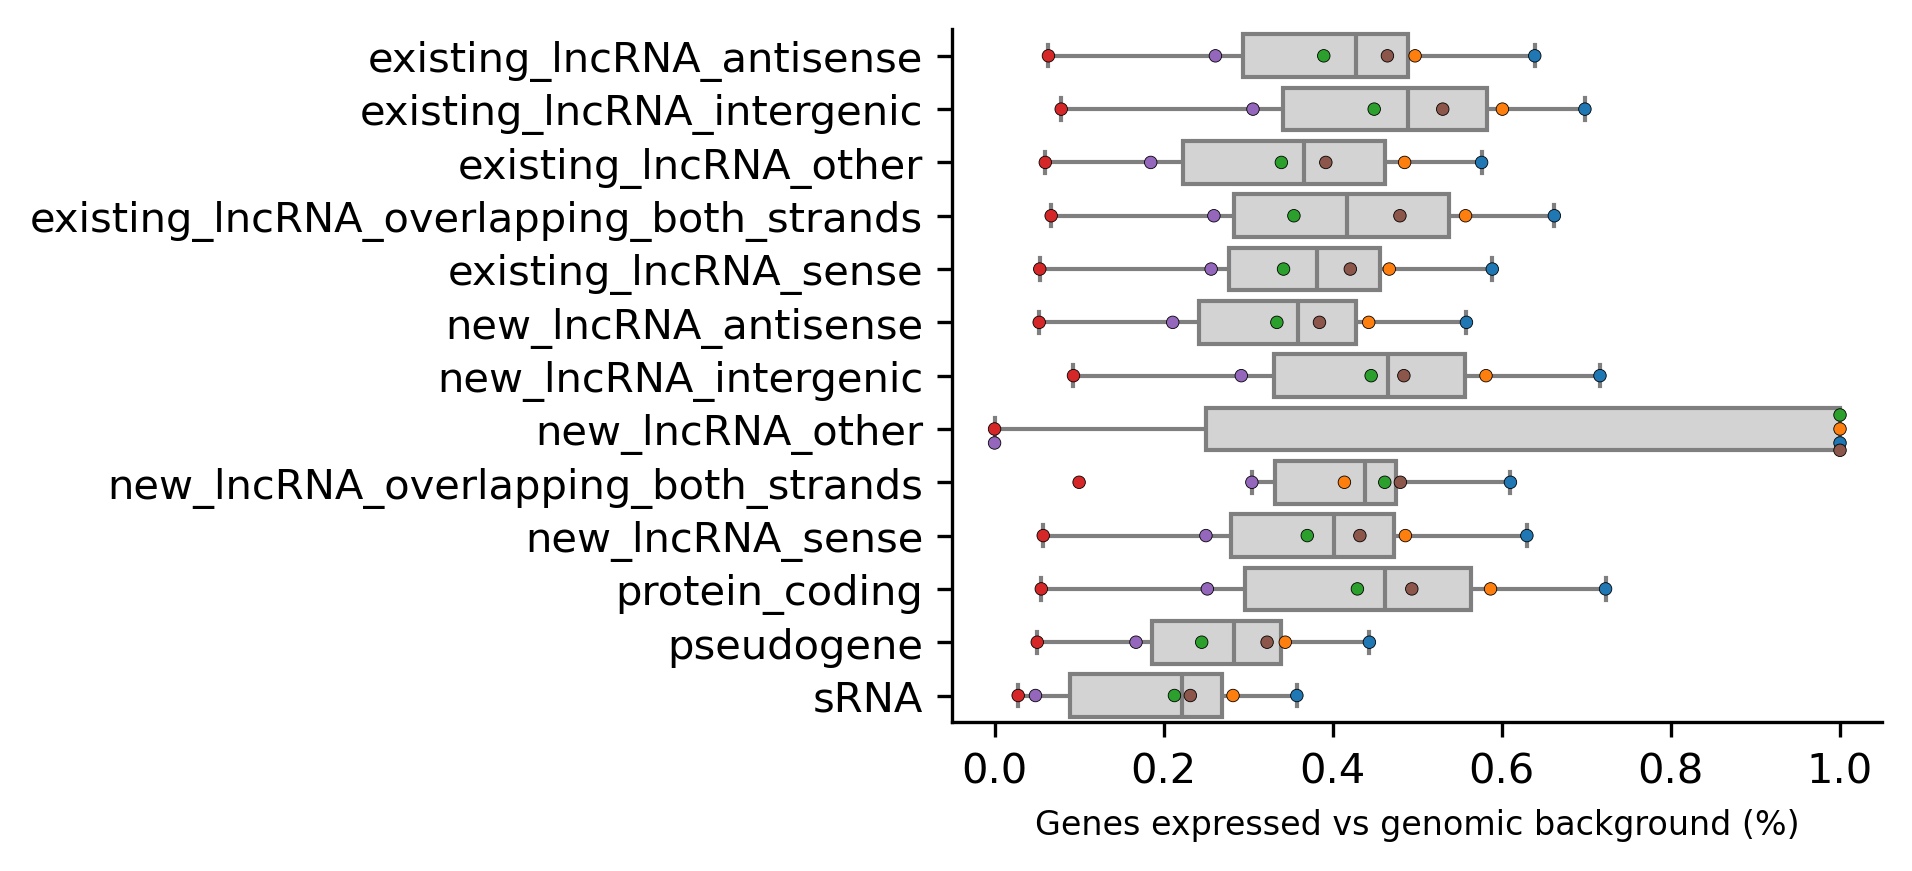

In [118]:
fig, ax = plt.subplots(figsize=(4,3), dpi=300)

sns.swarmplot(
    data=proportion_egene[proportion_egene['gene_type_category'] != 'artifact'],
    ax=ax,
    hue='tissue',
    y='gene_type_category',
    x='proportion_egene',
    linewidth=0.2,
    edgecolor='black',
    legend=False,
    zorder=2,
    s=3,)

sns.boxplot(proportion_egene[proportion_egene['gene_type_category']!='artifact'], x='proportion_egene', y='gene_type_category', legend=None, fill=True, fliersize=0, ax=ax, color='lightgrey', zorder=1)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Genes expressed vs genomic background (%)', fontsize=8)
ax.set_ylabel('')
# ax.set_xlim([0,100])

# ax.set_yticklabels(['protein coding', 'sRNA','pseudogene', 'existing lncRNA', 'new lncRNA'], fontsize=10)
plt.show()

In [119]:
# proportion of group expressed in each tissue category
total_sgene = gencode_ids.groupby('gene_type_category').agg({tissue: 'mean' for tissue in sgene_cols})
total_tested_sqtl = gencode_ids.groupby('gene_type_category').agg({tissue: 'mean' for tissue in stested_cols})

proportion_sgene = total_sgene/total_tested_sqtl.values
proportion_sgene = proportion_sgene.reset_index().melt(id_vars='gene_type_category', value_vars=sgene_cols, value_name='proportion_sgene')
proportion_sgene['tissue'] = proportion_sgene['variable'].str.split('.quantified').str[0]

/home/klawren/.pixi/envs/python/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/klawren/.pixi/envs/python/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 10.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


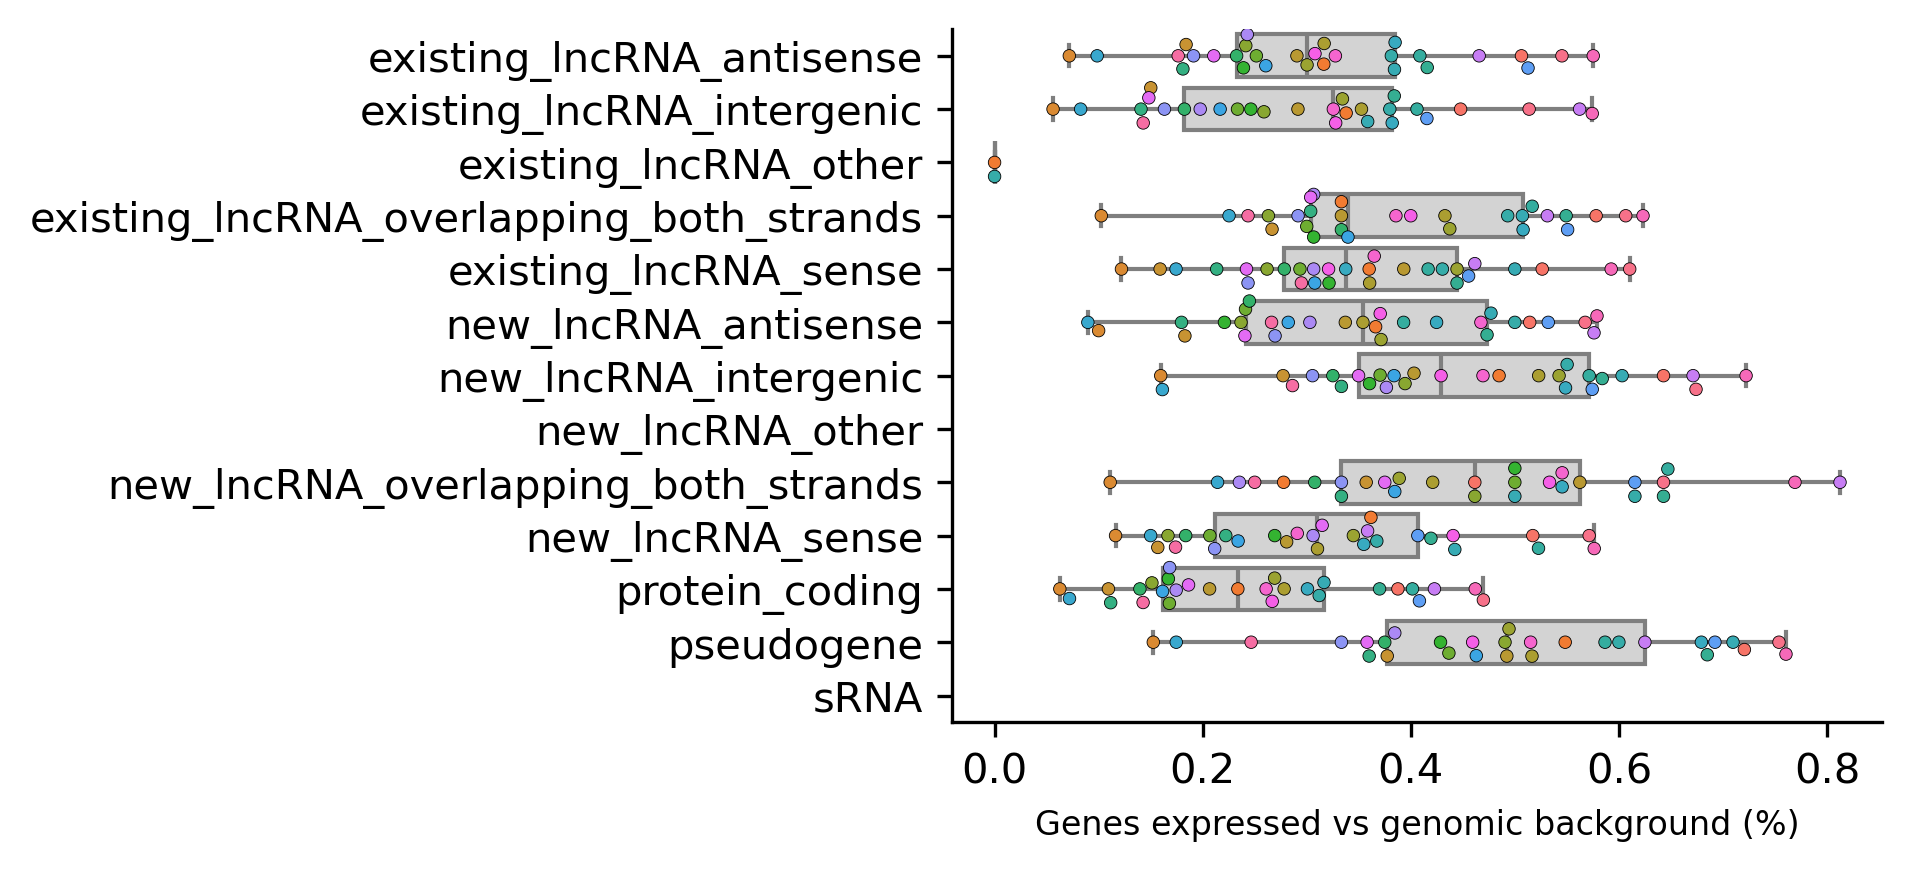

In [121]:
fig, ax = plt.subplots(figsize=(4,3), dpi=300)

sns.swarmplot(
    data=proportion_sgene[proportion_sgene['gene_type_category'] != 'artifact'],
    ax=ax,
    hue='tissue',
    y='gene_type_category',
    x='proportion_sgene',
    linewidth=0.2,
    edgecolor='black',
    legend=False,
    zorder=2,
    s=3,)

sns.boxplot(proportion_sgene[proportion_sgene['gene_type_category']!='artifact'], x='proportion_sgene', y='gene_type_category', legend=None, fill=True, fliersize=0, ax=ax, color='lightgrey', zorder=1)
ax.spines[['top', 'right']].set_visible(False)
ax.set_xlabel('Genes expressed vs genomic background (%)', fontsize=8)
ax.set_ylabel('')
# ax.set_xlim([0,100])

# ax.set_yticklabels(['protein coding', 'sRNA','pseudogene', 'existing lncRNA', 'new lncRNA'], fontsize=10)
plt.show()